<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

# Analyzing Relationships Between Engine Size, Cylinders, Fuel Consumption, and CO₂ Emissions
## Simple Linear Regression

    



### Importing Needed packages


In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<ipython-input-2-76706e26cc54>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.


In [3]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())




## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [5]:
await download(path, "FuelConsumption.csv")
path="FuelConsumption.csv"

In [6]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration
Let's first have a descriptive exploration on our data.


In [7]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:


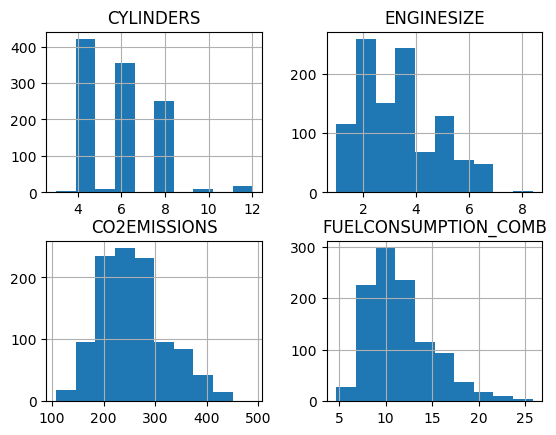

In [9]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


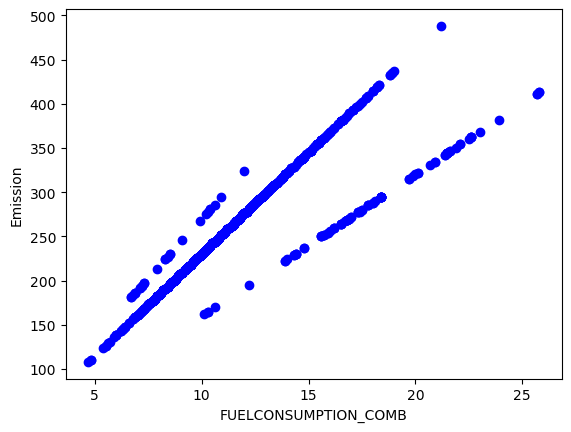

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

The scatter plot shows a positive linear relationship between combined fuel consumption (FUELCONSUMPTION_COMB) and CO₂ emissions. Higher fuel consumption is associated with increased CO₂ emissions, suggesting a direct link between fuel efficiency and environmental impact.

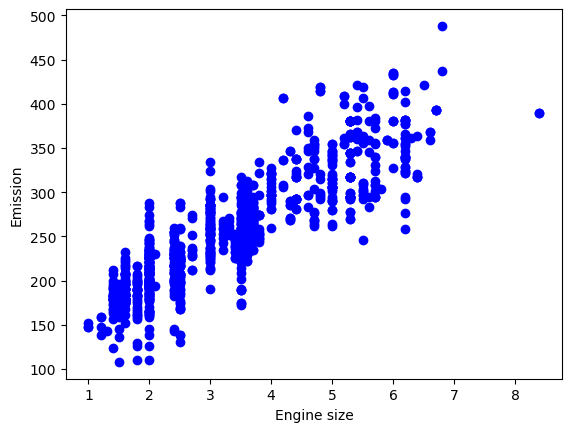

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

The scatter plot illustrates a positive linear relationship between engine size and CO₂ emissions. As engine size increases, CO₂ emissions tend to rise, indicating that larger engines produce higher emissions. This trend forms the basis for further regression analysis.


Plot __CYLINDER__ vs the Emission, to see how linear is their relationship is:


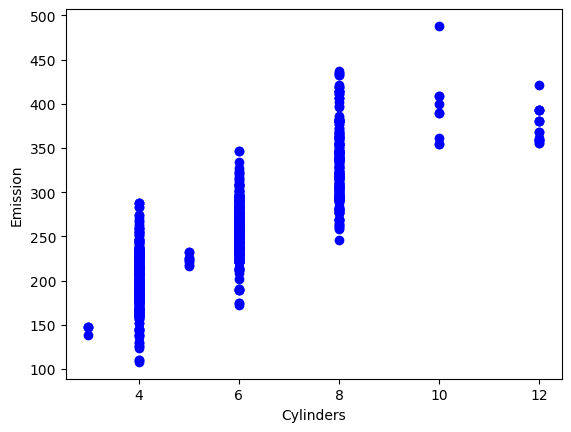

In [12]:
# write your code here

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()


The scatter plot reveals a positive linear relationship between the number of cylinders and CO₂ emissions. Vehicles with more cylinders tend to produce higher CO₂ emissions, highlighting the impact of engine configuration on environmental output.









#### Creating train and test dataset


Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 


In [13]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


#### Train data distribution


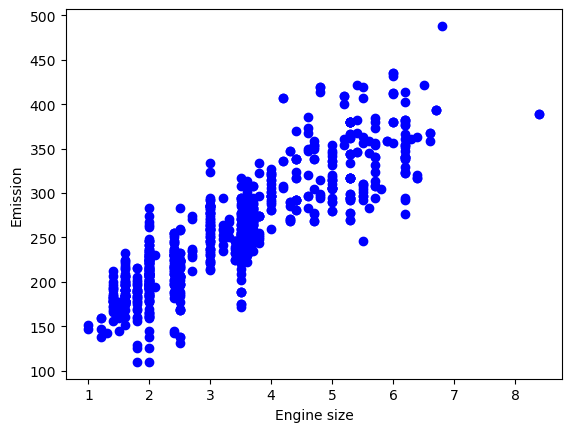

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.


In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.37270365]]
Intercept:  [124.77131251]


#### The linear regression model has generated the following values:

Coefficient (39.37): This represents the slope of the regression line. For every unit increase in engine size, CO₂ emissions are expected to increase by approximately 39.37 units, assuming all other factors remain constant.
Intercept (124.77): This indicates the point where the regression line crosses the y-axis. When the engine size is 0, the model predicts that CO₂ emissions would be approximately 124.77 units.

These values define the equation of the regression line:
CO₂ Emissions = 39.37 × Engine Size + 124.77

This relationship demonstrates a strong positive linear connection between engine size and CO₂ emissions.

#### Plot outputs


We can plot the fit line over the data:


Text(0, 0.5, 'Emission')

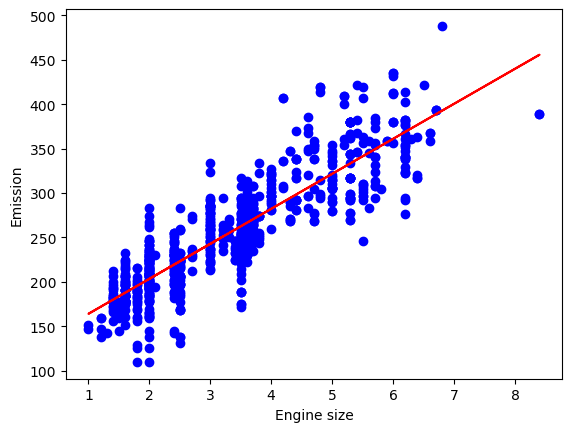

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

The scatter plot showcases a positive linear relationship between engine size and CO₂ emissions. The blue points represent the actual data, while the red line illustrates the linear regression model fitted to the data. The positive slope of the regression line confirms that as engine size increases, CO₂ emissions also rise. This visualization aligns with the calculated coefficient and intercept, reinforcing the model's predictive equation.

In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.00
Residual sum of squares (MSE): 893.09
R2-score: 0.76


#### The linear regression model's performance on the test data is evaluated using the following metrics:

Mean Absolute Error (23.00): On average, the model's predictions differ from the actual values by approximately 23 units. This indicates the magnitude of prediction errors.

Residual Sum of Squares (MSE: 893.09): This value measures the average squared difference between predicted and actual values. A lower value indicates better model accuracy, with 893.09 reflecting moderate error levels.

R² Score (0.76): This metric represents the proportion of variance in the CO₂ emissions explained by the model. An R² score of 0.76 indicates that 76% of the variability in CO₂ emissions is captured by the engine size predictor, showcasing a strong positive fit.

These metrics highlight the model's ability to effectively predict CO₂ emissions based on engine size, with room for improvement.

Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe


In [18]:


train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

Now train a Linear Regression Model using the `train_x` you created and the `train_y` created previously


In [19]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)


LinearRegression()

Find the predictions using the model's `predict` function and the `test_x` data


In [21]:
predictions = regr.predict(test_x)

Finally use the `predictions` and the `test_y` data and find the Mean Absolute Error value using the `np.absolute` and `np.mean` function like done previously


In [22]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))


Mean Absolute Error: 20.36


The Mean Absolute Error (MAE) for the regression model trained using the FUELCONSUMPTION_COMB feature is 20.36. This means that, on average, the model's predictions for CO₂ emissions differ from the actual values by approximately 20.36 units.

This lower MAE, when compared to the previous model trained on ENGINESIZE (which had an MAE of 23.00), suggests that fuel consumption may be a more accurate predictor of CO₂ emissions. As a result, using FUELCONSUMPTION_COMB improves the model’s prediction accuracy, offering a more reliable relationship for CO₂ emission forecasting.

While the engine size might seem like a reasonable factor, it doesn't directly correlate with CO₂ emissions in a predictable way. Engine size alone doesn't fully capture how much fuel is being consumed, which in turn has a greater impact on the amount of CO₂ produced. Fuel consumption directly represents how much fuel a vehicle uses, which is directly tied to the level of emissions it produces. This is why using fuel consumption as a predictor leads to more accurate predictions for CO₂ emissions.




## Author

Saeed Aghabozorgi


### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

Azim Hirjani

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<!--
## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-11-03 | 2.1  | Lakshmi Holla  |  Changed URL of the csv |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |
--!>




## Completed by Qazi Fabia Hoq  
Qazi Fabia Hoq (as part of the Data Science Professional Certificate by IBM)
